# Third Place Report(Design, Data, AI) [V2022]
### 2022 Version for Contribution to Architectural Institute of Korea
### 제3 공간 분석과 적용 (디자인, 데이터, 인공지능), 대한건축학회 프로젝트 리포트 기고 버전

##### [DaumBrunch Full Version](https://brunch.co.kr/@njnamju/148)

-----
* Inital research, [MIT Media Lab, City Science](https://www.media.mit.edu/groups/city-science/overview/) <br>
  [Third Place Mobility Energy Consumption Per Person](http://www.njstudio.co.kr/main/project/2016_MobilityEnergyConsumptionMITMediaLab/index.html) <br>

* Paper <br>
  [Lee, N. (2021). Understanding and Analyzing the Characteristics of the Third Place in Urban Design: A Methodology for Discrete and Continuous Data in Environmental Design. In: Yuan, P.F., Yao, J., Yan, C., Wang, X., Leach, N. (eds) Proceedings of the 2020 DigitalFUTURES. CDRF 2020. Springer, Singapore](https://doi.org/10.1007/978-981-33-4400-6_11)  <br>
  

* Contribution <br> [대한건축학회 : Architectural Institute of Korea](https://www.aik.or.kr/)
  제3 공간 분석과 적용 (디자인, 데이터, 인공지능)  <br> https://brunch.co.kr/@njnamju/148 <br>


-----
#### Author: NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

# 5. Network

### 5.1. Distance(Euclidean)

In [1]:
import numpy as np
import pandas as pd

In [2]:
def getData(path):
    df = pd.read_csv(path)
    df = df.iloc[:, 1:]
    print(df.shape)
    print(df)

    dataSet = df.to_numpy()

    np.random.seed(222)
    np.random.shuffle(dataSet)

    y = dataSet[:,-1:]
    X = dataSet[:,:-1]

    print('dim mat: ', X.shape)
    print('dim class: ', y.shape)
    return [X, y]

path = 'data/processed/google-third-place-Boston_DistanceClosest.csv'
[X_dis, y_dis] = getData(path)

(4273, 96)
       accounting      airport  amusement_park     aquarium  art_gallery  \
0        0.000000   879.090450         10000.0  2530.799961      10000.0   
1        0.000000    63.822178         10000.0  1109.989831      10000.0   
2        0.000000  2265.065944         10000.0  2531.345790      10000.0   
3        0.000000  1491.305936         10000.0  1029.258492      10000.0   
4        0.000000  1461.815938         10000.0  1839.759525      10000.0   
...           ...          ...             ...          ...          ...   
4268   737.940008  1392.514207         10000.0  1340.282323      10000.0   
4269  1682.692268   390.358154         10000.0  2320.612856      10000.0   
4270  1183.942178   786.399525         10000.0  1206.932494      10000.0   
4271   959.445103   938.856229         10000.0  1153.267606      10000.0   
4272  1130.185335   299.276388         10000.0  1400.963870      10000.0   

             atm       bakery        bank          bar  beauty_salon  ...  \

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def processDataForTrain(X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    stdScaleDis = StandardScaler()
    stdScaleDis.fit(X_train)
    X_train = stdScaleDis.transform(X_train)
    X_test  = stdScaleDis.transform(X_test)
    Y_train_outHot = to_categorical(Y_train)
    Y_test_outHot = to_categorical(Y_test)
    xDim = X_train.shape[1]
    yDim = Y_test_outHot.shape[1]

    return {
        'train_x': X_train,
        'test_x': X_test,
        'train_y': Y_train_outHot,
        'test_y': Y_test_outHot,
        'scaler': stdScaleDis,
        
    }
dataTrain_dis = processDataForTrain(X_dis, y_dis)
dataTrain_dis

{'train_x': array([[-0.87069485,  0.78769703,  0.0751646 , ...,  0.61893247,
          1.50248524, -1.09212053],
        [ 0.67080035, -0.91039996,  0.0751646 , ..., -1.13625152,
         -0.11336686,  0.19250371],
        [-0.67523875, -0.41616846,  0.0751646 , ...,  0.64739387,
          0.32589425, -0.41268   ],
        ...,
        [-0.32278441, -0.04600078,  0.0751646 , ..., -0.05349223,
         -0.75622654, -0.35295182],
        [-1.10086321,  0.94883799,  0.0751646 , ...,  0.32844499,
          1.63741245, -0.87232423],
        [ 0.47038605, -0.51206329,  0.0751646 , ...,  0.09381495,
         -0.35850656, -0.85071633]]),
 'test_x': array([[-0.97104969,  0.09783936,  0.0751646 , ...,  0.49226516,
          0.80641989, -0.52309157],
        [ 0.36701979,  0.13512819,  0.0751646 , ...,  0.21744228,
          0.30921592, -0.81688095],
        [-0.33888715, -0.41363772,  0.0751646 , ...,  0.03254823,
         -0.00399628, -0.77901483],
        ...,
        [ 0.37972592,  0.12460865

In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense

modelDis = Sequential()
modelDis.add(Dense(1024, input_dim=dataTrain_dis['train_x'].shape[1], activation='relu'))
modelDis.add(Dense(512, activation='relu'))
modelDis.add(Dense(dataTrain_dis['train_y'].shape[1], activation='softmax'))
modelDis.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [5]:
import time
start_time = time.time()

hist = modelDis.fit( 
    dataTrain_dis['train_x'], dataTrain_dis['train_y'], 
    validation_data=(dataTrain_dis['test_x'], dataTrain_dis['test_y']), 
    batch_size=32,
    epochs=50, 
    )

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
101/101 [==============================] - 2s 5ms/step - loss: 3.9931 - accuracy: 0.0696 - val_loss: 3.7433 - val_accuracy: 0.0786
Epoch 2/50
101/101 [==============================] - 0s 3ms/step - loss: 3.5517 - accuracy: 0.1102 - val_loss: 3.6584 - val_accuracy: 0.0973
Epoch 3/50
101/101 [==============================] - 0s 3ms/step - loss: 3.3589 - accuracy: 0.1398 - val_loss: 3.5769 - val_accuracy: 0.1123
Epoch 4/50
101/101 [==============================] - 0s 3ms/step - loss: 3.1999 - accuracy: 0.1576 - val_loss: 3.4975 - val_accuracy: 0.1384
Epoch 5/50
101/101 [==============================] - 0s 3ms/step - loss: 3.0548 - accuracy: 0.1785 - val_loss: 3.4836 - val_accuracy: 0.1197
Epoch 6/50
101/101 [==============================] - 0s 3ms/step - loss: 2.9498 - accuracy: 0.1866 - val_loss: 3.5078 - val_accuracy: 0.1235
Epoch 7/50
101/101 [==============================] - 0s 3ms/step - loss: 2.8424 - accuracy: 0.2110 - val_loss: 3.4794 - val_accuracy: 0.1160
Epoch 

34/34 [==============================] - 0s 2ms/step - loss: 4.2779 - accuracy: 0.1216
result:  [4.277867317199707, 0.12160898000001907]


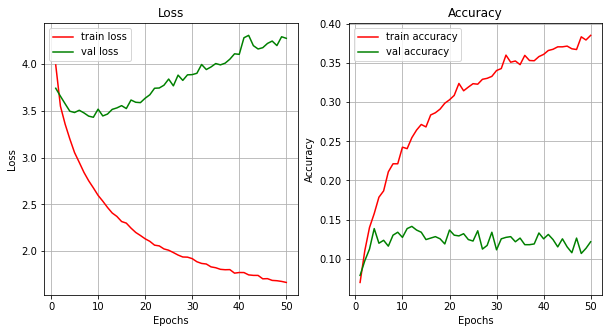

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

result = modelDis.evaluate(dataTrain_dis['test_x'], dataTrain_dis['test_y'])
print('result: ', result)

### 5.2. Decay model

In [7]:
class ModelThirdPlace:
  def __init__(self, path):
    self.path = path
    [self.X_raw, self.y_raw] = getData(path)
    self.data_train = processDataForTrain(self.X_raw, self.y_raw)

  def buildModel(self):
    self.model = Sequential()
    self.model.add(Dense(1024, input_dim=self.data_train['train_x'].shape[1], activation='relu'))
    self.model.add(Dense(512, activation='relu'))
    self.model.add(Dense(self.data_train['train_y'].shape[1], activation='softmax'))
    self.model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
  def fit(self):
    return self.model.fit( 
      self.data_train['train_x'], self.data_train['train_y'], 
      validation_data=(self.data_train['test_x'], self.data_train['test_y']), 
      batch_size=32,
      epochs=50, 
    )
  def eval(self):
    print('result: ', self.model.evaluate(self.data_train['test_x'], self.data_train['test_y']))


In [8]:
path = 'data/processed/google-third-place-Boston_DecayClosest.csv'
modelDecay = ModelThirdPlace(path)
modelDecay.buildModel()
hist = modelDecay.fit()

(4273, 96)
        accounting       airport  amusement_park      aquarium  art_gallery  \
0     1.000000e+00  1.455262e-04             0.0  8.985674e-12          0.0   
1     1.000000e+00  5.265367e-01             0.0  1.429257e-05          0.0   
2     1.000000e+00  1.298458e-10             0.0  8.936516e-12          0.0   
3     1.000000e+00  3.095564e-07             0.0  3.217266e-05          0.0   
4     1.000000e+00  4.163494e-07             0.0  9.328411e-09          0.0   
...            ...           ...             ...           ...          ...   
4268  6.012228e-04  8.355000e-07             0.0  1.412305e-06          0.0   
4269  4.522470e-08  1.977710e-02             0.0  7.429789e-11          0.0   
4270  6.797086e-06  3.694189e-04             0.0  5.394790e-06          0.0   
4271  6.489464e-05  7.981330e-05             0.0  9.251482e-06          0.0   
4272  1.166705e-05  4.939885e-02             0.0  7.674769e-07          0.0   

           atm    bakery      bank      

34/34 [==============================] - 0s 2ms/step - loss: 2.7540 - accuracy: 0.2834
result:  [2.7539913654327393, 0.2834424674510956]


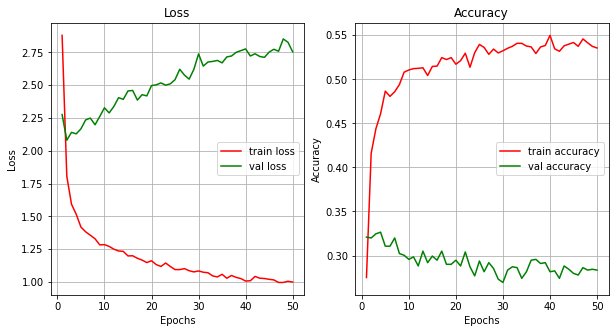

In [9]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

modelDecay.eval()

### 5.3. Prediction

In [10]:
import math
import json
def OpenJson(path): 
    json_file = open(path , 'r')
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data
def getDecay(cost, b = 0.01): # { // 0.002 // 0.999
    return math.pow(1 - b, cost)
def distanceGPS2KM(l0, l1): # get distance(KM)
    R = 6378.137; # Radius of earth in KM // a = Equatorial radius (6,378.1370 km) // b = Polar radius (6,356.7523 km)
    dLat = l1['lat'] * math.pi / 180 - l0['lat'] * math.pi / 180
    dLon = l1['lon'] * math.pi / 180 - l0['lon'] * math.pi / 180
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(l0['lat'] * math.pi / 180) * math.cos(l1['lat'] * math.pi / 180) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d # * 1000; # // * 1000; // meters
    # return d; # // * 1000; // meters
def distanceGPS2Meter(l0, l1):
    return distanceGPS2KM(l0, l1) * 1000
def distance2(x0, y0, x1, y1):
    return ((x1 - x0) * (x1 - x0)) + ((y1 - y0) * (y1 - y0))
def distance(l0, l1):
    return math.sqrt(distance2(l0['lon'], l0['lat'], l1['lon'], l1['lat']))
def GetDistanceClosest (loc, data, classList):
    distanceList = []
    for i in classList:
        distanceValue = 10000
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            value = distanceGPS2Meter(loc, otherLoc)
            if (value < distanceValue):
                distanceValue = value
        distanceList.append(distanceValue)
    return distanceList
def GetDistanceDecayClosest(loc, data, classList, BATA = 0.01):
    distanceList = []
    for i in classList:
        distanceValue = 0
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            value = getDecay(distanceGPS2Meter(loc, otherLoc), BATA)
            if distanceValue < value:
                distanceValue = value
        # if len(data[i]) != 0:
        #     distanceValue = distanceValue / len(data[i])
        distanceList.append(distanceValue)
    return distanceList

In [11]:
THE_PATH = "data/raw/google-third-place-Boston.json"
DATA_DIC = OpenJson(THE_PATH)
CLASS_LIST = []
for i in DATA_DIC:
    if i not in CLASS_LIST:
        CLASS_LIST.append(i)

print(len(CLASS_LIST))
print(CLASS_LIST)

95
['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storep

In [12]:

# https://www.google.com/maps/@42.3334714,-71.0793878,16.46z
# https://www.google.com/maps/@42.345085,-71.0674257,17z
# https://www.google.com/maps/place/75-113+St+James+Ave+Parking/@42.3502316,-71.0760466,17.98z

locs = [
    { 'lat': 42.345085, 'lon':-71.0674257 },
    { 'lat': 42.3334714, 'lon':-71.0793878 },
    { 'lat': 42.341134, 'lon':-71.082955 },
    { 'lat': 42.3502316, 'lon':-71.0760466 },
]

resultsDis = []
resultsDecay = []
for i in locs:
    result = GetDistanceClosest(i, DATA_DIC, CLASS_LIST)
    resultsDis.append(result)
    
    result = GetDistanceDecayClosest(i, DATA_DIC, CLASS_LIST)
    resultsDecay.append(result)

resultsDis = dataTrain_dis['scaler'].transform(resultsDis)
resultsDecay = modelDecay.data_train['scaler'].transform(resultsDecay)

In [13]:
predictionsDecay = modelDecay.model.predict(resultsDecay)
print(predictionsDecay.shape)

predictionsDis = modelDis.predict(resultsDis)
print(predictionsDis.shape)

for i in range(predictionsDis.shape[0]):
    print('model by distance: ', CLASS_LIST[np.argmax(predictionsDis[i])]) 

print('------------------')

for i in range(predictionsDecay.shape[0]):
    print('model by decay: ', CLASS_LIST[np.argmax(predictionsDecay[i])]) 

(4, 95)
(4, 95)
model by distance:  bar
model by distance:  school
model by distance:  travel_agency
model by distance:  bar
------------------
model by decay:  doctor
model by decay:  school
model by decay:  doctor
model by decay:  doctor


### 5.4. Decay model(Small) and Prediction

In [14]:
class ModelThirdPlaceSmall(ModelThirdPlace):
  def buildModel(self):
    self.model = Sequential()
    self.model.add(Dense(95, input_dim=self.data_train['train_x'].shape[1], activation='relu'))
    self.model.add(Dropout(0.75))
    self.model.add(Dense(self.data_train['train_y'].shape[1], activation='softmax'))
    self.model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [15]:
paths = [
    'data/processed/google-third-place-Boston_DistanceClosest.csv',
    'data/processed/google-third-place-Boston_DecayClosest.csv',
]

model = ModelThirdPlaceSmall(paths[0])
model.buildModel()
model.fit()
model.eval()
resultsDisScaled = model.data_train['scaler'].transform(resultsDis)
predictionsDis = model.model.predict(resultsDisScaled)
for i in range(predictionsDis.shape[0]):
    print('model by distance: ', CLASS_LIST[np.argmax(predictionsDis[i])]) 

(4273, 96)
       accounting      airport  amusement_park     aquarium  art_gallery  \
0        0.000000   879.090450         10000.0  2530.799961      10000.0   
1        0.000000    63.822178         10000.0  1109.989831      10000.0   
2        0.000000  2265.065944         10000.0  2531.345790      10000.0   
3        0.000000  1491.305936         10000.0  1029.258492      10000.0   
4        0.000000  1461.815938         10000.0  1839.759525      10000.0   
...           ...          ...             ...          ...          ...   
4268   737.940008  1392.514207         10000.0  1340.282323      10000.0   
4269  1682.692268   390.358154         10000.0  2320.612856      10000.0   
4270  1183.942178   786.399525         10000.0  1206.932494      10000.0   
4271   959.445103   938.856229         10000.0  1153.267606      10000.0   
4272  1130.185335   299.276388         10000.0  1400.963870      10000.0   

             atm       bakery        bank          bar  beauty_salon  ...  \

In [16]:
model = ModelThirdPlaceSmall(paths[1])
model.buildModel()
model.fit()
model.eval()
resultsDisScaled = model.data_train['scaler'].transform(resultsDecay)
resultsDecay = model.model.predict(resultsDisScaled)
for i in range(resultsDecay.shape[0]):
    print('model by distance: ', CLASS_LIST[np.argmax(resultsDecay[i])]) 

(4273, 96)
        accounting       airport  amusement_park      aquarium  art_gallery  \
0     1.000000e+00  1.455262e-04             0.0  8.985674e-12          0.0   
1     1.000000e+00  5.265367e-01             0.0  1.429257e-05          0.0   
2     1.000000e+00  1.298458e-10             0.0  8.936516e-12          0.0   
3     1.000000e+00  3.095564e-07             0.0  3.217266e-05          0.0   
4     1.000000e+00  4.163494e-07             0.0  9.328411e-09          0.0   
...            ...           ...             ...           ...          ...   
4268  6.012228e-04  8.355000e-07             0.0  1.412305e-06          0.0   
4269  4.522470e-08  1.977710e-02             0.0  7.429789e-11          0.0   
4270  6.797086e-06  3.694189e-04             0.0  5.394790e-06          0.0   
4271  6.489464e-05  7.981330e-05             0.0  9.251482e-06          0.0   
4272  1.166705e-05  4.939885e-02             0.0  7.674769e-07          0.0   

           atm    bakery      bank      

-----
### References & Useful links

Lee, N. (2021). Understanding and Analyzing the Characteristics of the Third Place in Urban Design: A Methodology for Discrete and Continuous Data in Environmental Design. In: Yuan, P.F., Yao, J., Yan, C., Wang, X., Leach, N. (eds) Proceedings of the 2020 DigitalFUTURES. CDRF 2020. Springer, Singapore. https://doi.org/10.1007/978-981-33-4400-6_11



Oldenburg, R., Brissett, (1982). D.: The third place. Qual. Sociol. 5(4), 265–284



Lee, Namju. (2022). Computational Design, Seoul, Bookk, https://brunch.co.kr/@njnamju/144



Lee, Namju, (2022). Discrete Urban Space and Connectivity, https://nj-namju.medium.com/discrete-urban-space-and-connectivity-492b3dbd0a81



Woo. Junghyun, (2022). Numeric Network Analysis for Pedestrians, https://axuplatform.medium.com/0-numeric-network-analysis-47a2538e636c



Lee, Namju, (2022). Computational Design Thinking for Designers, https://nj-namju.medium.com/computational-design-thinking-for-designers-68224bb07f5c



Lee, Namju. (2016). Third Place Mobility Energy Consumption Per Person, http://www.njstudio.co.kr/main/project/2016_MobilityEnergyConsumptionMITMediaLab 
